# **2021 JOISS 해양과학 빅데이터 활용 경진대회** 

## COD 예측을 통한 특별관리해역 선정 ❕❗

# **목차**  

##   **1. 서론** 
- #### 1.1 특별관리해역과 COD란?
- #### 1.2 연안오염 총량 관리 계획의 현황
- #### 1.3 목표정의  

##   **2. 데이터 전처리**
- #### 2.1 데이터 병합  
- #### 2.2 결측치 데이터 확인  
- #### 2.3 데이터 주기 확인  
- #### 2.4 그룹핑  
  - ##### 2.4.1 2월,8월,5월,11월 각 구역 수 확인  
  - ##### 2.4.2 그룹 1(2월 8월)  
  - ##### 2.4.3 그룹 2(5월 11월)

##   **3. EDA(탐색적 데이터 분석)**
- #### 3.1 feature간 상관관계  
- #### 3.2 COD와 feature의 상관관계  
- #### 3.3 COD와 선별된 feature 상관관계 시각화 맵  

##   **4. 모델링** 
- #### 4.1 모델링 데이터 프레임  
  - ##### 4.1.1 target 설정
  - ##### 4.1.2 학습 및 예측시킬 데이터 셋 분리  
- #### 4.2 모델 선정  
- #### 4.3 랜덤포레스트 모델  
- #### 4.4 하이퍼 파라미터 튜닝  
- #### 4.5 예측 결과  
  - ##### 4.5.1 그룹1 예측결과  
  - ##### 4.5.2 그룹2 예측결과
  - ##### 4.5.3 12개월 이후 yhat 예측  

##   **5. 결론**     
- #### 5.1 결과 해석  
  - ##### 5.1.1 예측 COD 추세 시각화  
  - ##### 5.1.2 2020-2021 COD 증감 비율
  - ##### 5.1.3 특별관리해역 선정 맵핑  
- #### 5.2 활용 방안  
- #### 5.3 한계 및 시사점

# 1. 서론

안녕하세요 **부경대학교 가온팀**입니다.

해양환경오염이 나날이 심각해지면서 해양생태계를 교란시키고 인간의 생활환경을 위협하고 있으나 인류의 관심은 오히려 무뎌지고 있습니다.  
해양은 육지보다 접근이 힘들기 때문에 정화가 어렵고 훨씬 많은 비용이 소요됩니다. 

화학적 오염물질들이 완전히 제거되지 않는 환경 속에서 현재도 많은 해양생물들은 힘겹게 숨 쉬며 살아가고 있으며,  
해안 곳곳에서 **해양오염으로 인한 물고기 떼죽음**이 빈번하게 발생하고 있습니다.  

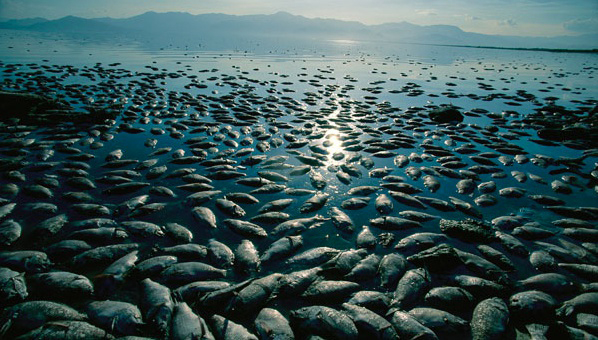 [출처](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cheha333&logNo=220609151196)

## 1.1 특별관리해역과 COD란?

해양환경이 인류의 무관심 속에 방치되지 않도록 하기 위해 해양환경 및 생태계의 보전에 현저한 장애가 있거나 장애가 발생할 우려가 있는 해역을 '**[특별관리해역](http://www.busancoast.or.kr/ko/7)**'으로 지정하여 관리하고 있습니다.

> [특별관리해역](https://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxMainPrint.do?idx_cd=1273&board_cd=INDX_001)은 인근에 다른 해역에 비해 국민의 건강 및 해양환경의 보전을 위해 특별히 관리가 필요한 해역으로서,  
해역 안에서의 시설의 설치와 변경에 제한을 두고 소재하는 사업장에서 배출되는 오염물질의 총량을 규제하는 방식으로 관리합니다.

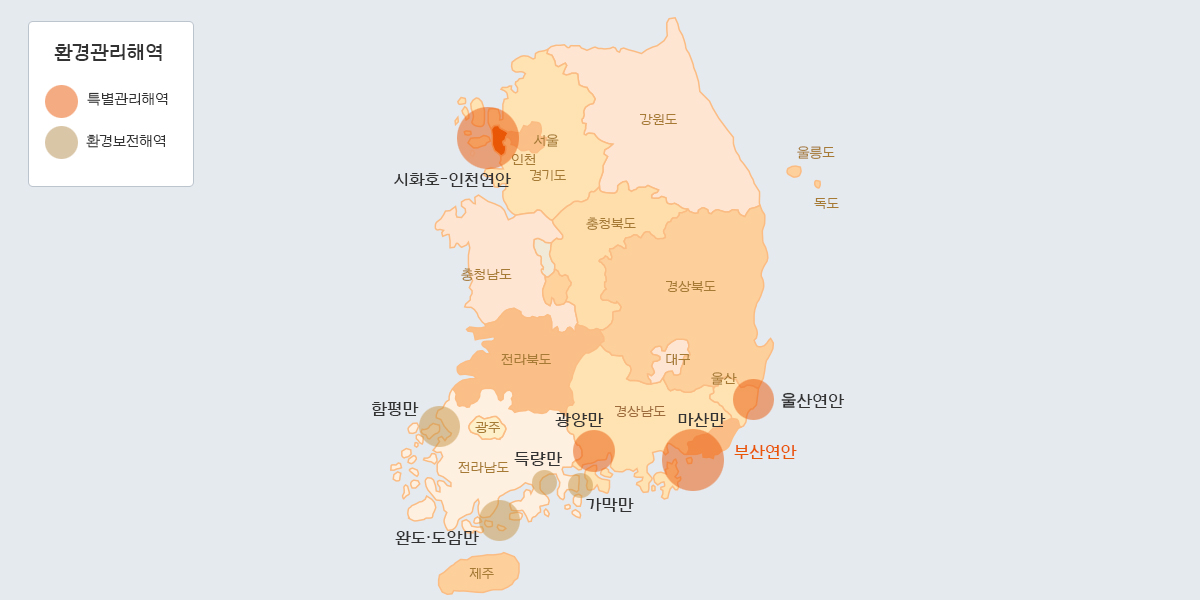

> [화학적 산소 요구량](http://www.guro.go.kr/www/contents.do?key=2830&) (COD, Chemical Oxygen Demand)은 대표적인 오염물질 총량규제 항목입니다.  
해양이나 호수에 흘러 들어온 유해물질을 함유한 공장 폐수의 오염도를 알고자 할 때 COD를 이용합니다.

## 1.2 연안오염 총량 관리 계획의 현황

현재 우리나라는 주기적으로 측정한 해양환경측정망 자료를 활용해 해양오염의 정도를 파악하여 특별관리해역 연안오염총량관리 계획을 수립하고 평가 중에 있습니다.

- 2015~2020년 광양만,인천연안 COD 추세  

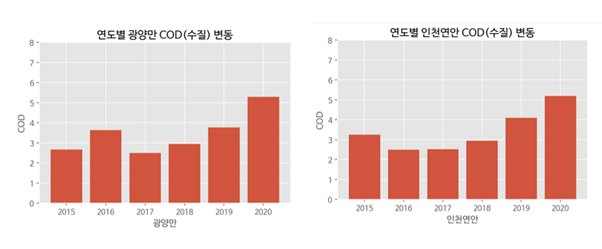



그러나 특별관리해역 중 광양만과 인천연안의 **연도별 COD는 꾸준히 증가**하는 것을 확인할 수 있습니다. 단기적으로 COD가 개선되는 것으로 보였으나, 장기적으로 보았을 때 COD가 점차 증가하는 추세를 보입니다.

지금까지 **과거의 데이터만으로 수질관리계획을 세웠기 때문에** 해당 관리계획이 수질 개선에 미칠 영향, COD의 변화 등을 파악하기 어려웠을 것이라 생각합니다.   
또한, 당장 직면한 상황을 수습하려는 정책들로 미래의 COD를 감소시키는 데에는 한계가 있었을 것이라 예상할 수 있었고, 이는 특별관리해역의 관리목적과 부적합하다고 생각했습니다.

이제는 해양환경측정만으로 정책을 수립하는 것이 아니라, 해당 자료를 통해 **COD를 예측**하여 미래의 데이터로 **미래지향적이고 장기적 효과를 기대할 수 있는 정책**을 수립할 수 있을 것이라 기대합니다.

## 1.3 목표 정의

저희 과제의 목표는 2015년부터 2020년까지의 **JOISS 해양환경측정망 데이터**를 활용하여 COD(화학적 산소요구량)를 target으로 하여 다음 년의 COD를 예측하는 모델을 개발하는 것입니다.  

JOISS 해양환경측정망 자료에는 COD를 포함한 환경데이터 측정값이 3개월을 주기로 정리되어 있습니다.  
우리는 **COD와 상관관계가 높은 feature(독립변수)를 추출하여 COD를 예측**할 수 있을 것입니다.

구역별 COD(화학적 산소요구량) 예측을 마친 뒤, 추가적으로 특별관리해역을 선정하여 수질을 관리해야 할 구역은 없는지 알아볼 것입니다.  

이를 통해, 우리는 **'특별관리해역 관리'**라는 의사결정 문제에 **새로운 방향성을 제안**하고자 합니다.



# 2. 데이터 전처리

## 2.1 데이터 병합

- 사용 데이터

해양환경측정망_2015_profile_chemical.csv

해양환경측정망_2016_profile_chemical.csv

해양환경측정망_2017_profile_chemical.csv

해양환경측정망_2018_profile_chemical.csv

해양환경측정망_2019_profile_chemical.csv

해양환경측정망_2020_profile_chemical.csv



2015년부터 2020년까지의 데이터를 하나의 데이터프레임으로 병합하고 측정 날짜와 시간을 데이터프레임에 나타내 주었습니다.

해양수산부는 **특별관리해역 표층수의 COD를 측정하여 수질현황**을 나타내고 있기 때문에 수심 데이터 중 **‘표층’**만 남겨두었고, 

데이터프레임에서 필요하지 않은 feature를 삭제하고 결측치를 제거하였습니다.




In [ ]:
# 2015년부터 2020년까지의 해양환경측정망 데이터 불러오기 
df2015 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2015_profile_chemical.csv')
df2016 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2016_profile_chemical.csv')
df2017 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2017_profile_chemical.csv')
df2018 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2018_profile_chemical.csv')
df2019 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2019_profile_chemical.csv')
df2020 = pd.read_csv('/content/gdrive/MyDrive/해양/marin/해양환경측정망_2020_profile_chemical.csv')

# 2015, 2016 오타 수정 
df2015.rename(columns = {'부유물질 농도[μg/L]' : '부유물질 농도[mg/L]'}, inplace = True)
df2016.rename(columns = {'부유물질 농도[μg/L]' : '부유물질 농도[mg/L]'}, inplace = True)

# 데이터 프레임 합치기
df = pd.concat([df2015,df2016, df2017, df2018, df2019, df2020], axis=0)

#화학적산소요구량 -> COD로 변환
df['COD'] = df['화학적산소요구량[mg/L]']

# 수심이 표층만 살려두기
df = df[df['수심(m)'] == 0]

# 필요없는 feature 삭제
df = df.drop(['화학적산소요구량[mg/L]', 'project_name','bot.depth[m]','수심(m)', '수심(text)', 'dep_flag', 'tn_qc', 'sal_qc', 'wtrtmp_qc', 'chla_qc', 'sussed_qc'
, 'disoxy_qc', 'hydioncon_qc', 'reasil_qc', 'nitnit_qc', 'po4p_qc', 'natnit_qc', 'tr_qc', 'disinon_qc'
, 'cheoxydem_qc', 'amn_qc', 'totp_qc','투명도[m]', '유효시간', '전체수심(m)', 'totdisn_qc'], axis=1)

# datetime 만들기
df.rename(columns={'yyyy-mm-dd hh:mm:ss':'date'}, inplace = True )
df['date'] = pd.to_datetime(df['date'])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

df.shape

(9502, 23)

In [ ]:
# 9502행과 23열을 가진 정제된 해양환경측정망 데이터 프레임
df.head()

station       date  Longitude [degrees_east]  Latitude [degrees_north]  \
0  가로림연안1_연안 2015-02-15                126.326944                 36.946389   
2  가로림연안1_연안 2015-05-10                126.326944                 36.946389   
4  가로림연안1_연안 2015-08-08                126.326944                 36.946389   
6  가로림연안1_연안 2015-11-12                126.326944                 36.946389   
8  가로림연안2_연안 2015-02-15                126.313333                 36.990000   

   총질소[μg/L]  염분[psu]    수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  용존산소[mg/L]  \
0    379.060  32.0841   3.5593         1.092           16.2    10.54070   
2    407.890  31.9136   9.7594         3.220           13.6    10.34200   
4    225.280  31.9163  21.6454         2.760            3.8     7.95450   
6    315.545  31.9800  15.6163         0.904           20.6     8.31033   
8    387.421  32.0735   3.7966         0.996           17.4    10.42260   

   수소이온농도[무단위]  규산염[μg/L]  아질산성질소[μg/L]  인산염인[μg/L]  질산성질소[μg/L]  \
0         8.17    375.600         1.792      24.025      190.232   
2         8.16     88.452         2.254      12.834      131.614   
4         8.04    142.940        14.392       8.959       37.800   
6         8.09    347.480        11.942      22.537      100.464   
8         8.17    384.500         1.834      24.614      197.204   

   용존무기질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]       COD  year  month  day  hour  
0       194.012           1.988   41.7409  1.497090  2015      2   15     0  
2       136.150           2.282   23.0668  1.044110  2015      5   10     0  
4        58.338           6.146   24.2634  1.588370  2015      8    8     0  
6       119.630           7.224   36.8339  0.855856  2015     11   12     0  
8       201.292           2.254   42.4892  1.315460  2015      2   15     0

## 2.2 결측치 데이터 확인

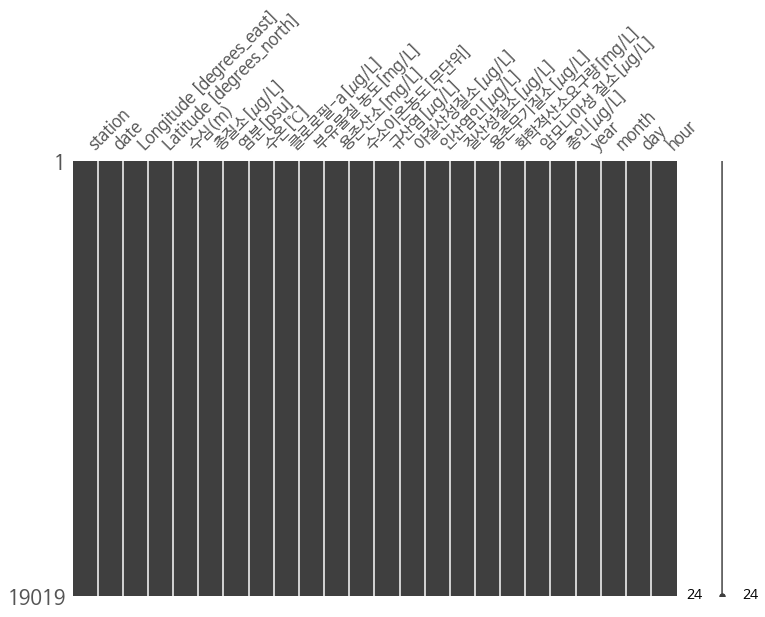

In [ ]:
#결측치 데이터 시각화
msno.matrix(df, figsize=(12,8)) 

In [ ]:
df.isnull().sum()

station                     0
date                        0
Longitude [degrees_east]    0
Latitude [degrees_north]    0
총질소[μg/L]                   0
염분[psu]                     0
수온[℃]                       0
클로로필-a[μg/L]                0
부유물질 농도[mg/L]               0
용존산소[mg/L]                  0
수소이온농도[무단위]                 0
규산염[μg/L]                   0
아질산성질소[μg/L]                0
인산염인[μg/L]                  0
질산성질소[μg/L]                 0
용존무기질소[μg/L]                0
암모니아성 질소[μg/L]              0
총인[μg/L]                    0
COD                         0
year                        0
month                       0
day                         0
hour                        0
dtype: int64

결측치를 가진 데이터는 발견되지 않았습니다.

## 2.3 데이터 주기 확인

**월 주기를 기준으로 COD 예측 모델**을 만들 것이기 때문에 데이터의 월별 주기성을 확인하였습니다.

JOISS 해양환경측정망 데이터에는 COD를 포함한 환경데이터 측정값이 3개월을 주기로 정리되어 있지만


2월에 미쳐 다 측정하지 못하여 3월에 측정된 데이터들을 확인하였습니다.

In [ ]:
# 2월, 5월, 8월, 11월, 3월이 데이터 프레임에 들어있는 것을 확인
df['month'].unique()

array([ 2,  5,  8, 11,  3])

In [ ]:
df.loc[df.month == 3].head()

station       date  Longitude [degrees_east]  \
624     기장연안2_연안 2019-03-05                129.216667   
632     기장연안3_연안 2019-03-05                129.291667   
640     기장연안4_연안 2019-03-05                129.252222   
648    기장연안H1_항만 2019-03-05                129.228611   
732  낙동강하구1_환경관리 2019-03-02                128.927220   

     Latitude [degrees_north]  총질소[μg/L]  염분[psu]  수온[℃]  클로로필-a[μg/L]  \
624                 35.166667      129.8    34.44  13.82          2.80   
632                 35.300000       99.5    34.45  15.01          2.22   
640                 35.265000      130.0    34.32  14.12          1.48   
648                 35.222778      216.0    34.42  13.93          1.32   
732                 35.012780      186.0    33.74  12.05          1.32   

     부유물질 농도[mg/L]  용존산소[mg/L]  수소이온농도[무단위]  규산염[μg/L]  아질산성질소[μg/L]  \
624            4.5        9.42         8.32      101.0           3.9   
632            4.8        9.49         8.33      107.4           3.0   
640            6.5        8.95         8.33      127.1           3.4   
648            5.5        8.21         8.25      189.0           3.5   
732            3.6        9.86         8.30      123.0           4.5   

     인산염인[μg/L]  질산성질소[μg/L]  용존무기질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]   COD  \
624         6.0         20.2          31.2             7.1      19.1  0.39   
632         5.0         14.7          19.9             2.2      13.5  0.43   
640         7.4         19.5          33.1            10.2      18.1  0.32   
648        17.4         30.1          75.7            42.1      31.4  0.55   
732         6.0         62.1          81.2            14.6      16.3  1.15   

     year  month  day  hour  
624  2019      3    5     0  
632  2019      3    5     0  
640  2019      3    5     0  
648  2019      3    5     0  
732  2019      3    2     0

In [ ]:
len(df.loc[df.month == 3])

47

In [ ]:
# 3개월 간격이므로 3월 데이터 2월로 치환
df.loc[df.month == 3,'month']=2
df['month'].unique()

array([ 2,  5,  8, 11])

3월의 데이터는 47개로 확인하였습니다.

따라서 3월 데이터를 2월 데이터로 치환하였습니다.

## 2.4 그룹핑

### 2.4.1 2월, 8월, 5월, 11월 각 구역 수 확인

3개월을 주기로 측정된 데이터에서 월별 측정 구역의 수를 보면 2월과 8월은 420여개, 5월과 11월은 370여개인 것을 확인하였습니다.

In [ ]:
# 연도별 2월 겨울 station 구역수 확인
for i in df['year'].unique():
  print(i, len(df.groupby(['year', 'month', 'station']).mean().loc[i, 2]))

2015 417
2016 413
2017 417
2018 425
2019 423
2020 421


In [ ]:
# 연도별 8월 여름 station 구역수 확인
for i in df['year'].unique():
  print(i, len(df.groupby(['year', 'month', 'station']).mean().loc[i, 8]))

2015 416
2016 413
2017 415
2018 425
2019 425
2020 421


In [ ]:
# 연도별 5월 봄 station 구역수 확인
for i in df['year'].unique():
  print(i, len(df.groupby(['year', 'month', 'station']).mean().loc[i, 5]))

2015 367
2016 363
2017 367
2018 375
2019 373
2020 386


In [ ]:
# 연도별 11월 가을 station 구역수 확인
for i in df['year'].unique():
  print(i, len(df.groupby(['year', 'month', 'station']).mean().loc[i, 11]))

2015 367
2016 363
2017 367
2018 375
2019 375
2020 371


따라서 월별로 데이터 프레임을 만들고 6개년에서 중복되지 않는 구역을 제거하였습니다.

In [ ]:
# 2월 데이터 프레임
df2 = df[df['month'] == 2]
# 8월 데이터 프레임
df8 = df[df['month'] == 8]
# 5월 데이터 프레임
df5 = df[df['month'] == 5]
# 11월 데이터 프레임
df11 = df[df['month'] == 11]

In [ ]:
# 2월 데이터 프레임 station 중복되지 않은 구역 제거
for i in df['year'].unique():
  duplicate = df2[df2['year'] == i]['station'].unique() 
  df2 = df2[df2['station'].isin(duplicate)]
len(df2['station'].unique())

410

In [ ]:
# 8월 데이터 프레임 station 중복되지 않은 구역 제거
for i in df['year'].unique():
  duplicate = df8[df8['year'] == i]['station'].unique() 
  df8 = df8[df8['station'].isin(duplicate)]
len(df8['station'].unique())

411

In [ ]:
# 5월 데이터 프레임 station 중복되지 않은 구역 제거
for i in df['year'].unique():
  duplicate = df5[df5['year'] == i]['station'].unique() 
  df5 = df5[df5['station'].isin(duplicate)]
len(df5['station'].unique())

361

In [ ]:
# 11월 데이터 프레임 station 중복되지 않은 구역 제거
for i in df['year'].unique():
  duplicate = df11[df11['year'] == i]['station'].unique() 
  df11 = df11[df11['station'].isin(duplicate)]
len(df11['station'].unique())

363

측정 구역의 수가 유사한 월끼리 묶어 공통 구역의 수를 구해보면 2월과 8월은 409개, 5월과 11월은 361개 구역 입니다. 

이는 대부분의 측정 구역이 같다는 것을 의미하므로 중복되지 않는 구역을 제거할 것입니다.

따라서 **2월 + 8월 겨울 여름 데이터(그룹 1), 5월 + 11월 봄 가을 데이터(그룹 2)**로 그룹핑하여 

중복이 되지 않는 구역이 어느 구역인지 확인하고 이를 제거 할 것입니다.

In [ ]:
# 8월 데이터프레임에 2월에 없는 도암만3, 도암만5 제거
df8[df8['station'].isin(df2['station'].unique()) == False]['station'].unique()

array(['도암만3_환경관리', '도암만5_환경관리'], dtype=object)

In [ ]:
# 2월 데이터프레임에 8월에 없는 영일만H1 제거
df2[df2['station'].isin(df8['station'].unique()) == False]['station'].unique()

array(['영일만H1_항만'], dtype=object)

In [ ]:
# 5월 데이터프레임은 11월을 모두 내포
df5[df5['station'].isin(df11['station'].unique()) == False]['station'].unique()

array([], dtype=object)

In [ ]:
# 11월 데이터프레임에 5월에 없는 도암만3, 도암만5 제거
df11[df11['station'].isin(df5['station'].unique()) == False]['station'].unique()

array(['도암만3_환경관리', '도암만5_환경관리'], dtype=object)

### 2.4.2 그룹1 (2월 8월)

2월과 8월 데이터를 병합하여, 앞서 확인한 중복되지 않는 구역을 제거한 데이터 프레임 'df28' 를 생성하였습니다.

In [ ]:
df2 = df2[df2['station'].isin(df8['station'].unique())]
df8 = df8[df8['station'].isin(df2['station'].unique())]
df28 = pd.concat([df2,df8], axis=0)
df28 = df28.sort_values(['year', 'month'])
df28

station                date  Longitude [degrees_east]  \
0     가로림연안1_연안 2015-02-15 00:00:00                126.326944   
8     가로림연안2_연안 2015-02-15 00:00:00                126.313333   
16    가로림연안3_연안 2015-02-15 00:00:00                126.200000   
24    가로림연안4_연안 2015-02-15 00:00:00                126.333611   
32    가로림연안5_연안 2015-02-15 00:00:00                126.322500   
...         ...                 ...                       ...   
3130  행암만3_환경관리 2020-08-05 16:16:00                128.679720   
3138  행암만4_환경관리 2020-08-05 16:03:00                128.687780   
3146   후포연안1_연안 2020-08-17 13:46:00                129.458889   
3154   후포연안2_연안 2020-08-17 12:27:00                129.483611   
3160  후포연안H1_항만 2020-08-17 12:53:00                129.457778   

      Latitude [degrees_north]  총질소[μg/L]  염분[psu]    수온[℃]  클로로필-a[μg/L]  \
0                    36.946389    379.060  32.0841   3.5593         1.092   
8                    36.990000    387.421  32.0735   3.7966         0.996   
16                   36.941667    395.111  32.0572   3.8867         1.088   
24                   36.922500    384.477  32.0980   3.4265         1.020   
32                   36.970833    383.872  32.0889   3.6491         0.924   
...                        ...        ...      ...      ...           ...   
3130                 35.144440    821.520  20.4961  27.4106        23.200   
3138                 35.146110    859.502  24.7374  23.5298        34.920   
3146                 36.647500     93.688  32.1025  22.0892         0.810   
3154                 36.694444     99.778  32.3917  21.1699         0.940   
3160                 36.678333     86.408  31.8048  21.0931         1.752   

      부유물질 농도[mg/L]  용존산소[mg/L]  수소이온농도[무단위]  규산염[μg/L]  아질산성질소[μg/L]  \
0             16.20    10.54070         8.17    375.600         1.792   
8             17.40    10.42260         8.17    384.500         1.834   
16            20.80    10.45630         8.14    383.900         1.708   
24            15.20    10.72620         8.20    368.700         1.890   
32            10.60    10.67560         8.17    374.100         1.386   
...             ...         ...          ...        ...           ...   
3130           9.10    10.49040         8.50    792.904        26.334   
3138           9.10     7.14407         8.17    789.432        14.154   
3146           6.45     9.64235         8.17     82.712         0.140   
3154          11.30     9.73263         8.18     81.536         0.210   
3160           5.55     9.69785         8.18     94.164         0.084   

      인산염인[μg/L]  질산성질소[μg/L]  용존무기질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]  \
0        24.0250      190.232       194.012           1.988   41.7409   
8        24.6140      197.204       201.292           2.254   42.4892   
16       24.4590      197.330       201.866           2.828   43.9692   
24       23.9010      168.588       172.900           2.422   40.5083   
32       24.1180      174.818       178.164           1.960   36.3168   
...          ...          ...           ...             ...       ...   
3130      3.7200      267.022       360.948          67.592   65.9370   
3138      3.2550      118.062       220.164          87.948   78.0270   
3146      0.0075        1.694         5.110           3.276    8.8970   
3154      0.0075        4.046        10.360           6.104    9.1140   
3160      0.0000        2.338        23.296          20.874   14.0740   

          COD  year  month  day  hour  
0     1.49709  2015      2   15     0  
8     1.31546  2015      2   15     0  
16    1.49709  2015      2   15     0  
24    1.43104  2015      2   15     0  
32    1.24941  2015      2   15     0  
...       ...   ...    ...  ...   ...  
3130  5.65278  2020      8    5    16  
3138  5.44040  2020      8    5    16  
3146  1.38667  2020      8   17    13  
3154  1.40331  2020      8   17    12  
3160  1.68619  2020      8   17    12  

[4918 rows x 23 columns]

In [ ]:
print(len(df28['station'].unique()))

409


최종적으로 2월과 8월의 공통 구역의 수는 409개로 확인하였습니다.


### 2.4.3 그룹 2 (5월 11월)

5월과 11월 데이터를 병합하여, 앞서 확인한 중복되지 않는 구역을 제거한 데이터 프레임 'df511' 를 생성하였습니다.

In [ ]:
df5 = df5[df5['station'].isin(df11['station'].unique())]
df11 = df11[df11['station'].isin(df5['station'].unique())]
df511 = pd.concat([df5,df11], axis=0)
df511 = df511.sort_values(['year', 'month'])
df511

station                date  Longitude [degrees_east]  \
2     가로림연안1_연안 2015-05-10 00:00:00                126.326944   
10    가로림연안2_연안 2015-05-10 00:00:00                126.313333   
18    가로림연안3_연안 2015-05-10 00:00:00                126.200000   
26    가로림연안4_연안 2015-05-10 00:00:00                126.333611   
34    가로림연안5_연안 2015-05-10 00:00:00                126.322500   
...         ...                 ...                       ...   
3124  행암만2_환경관리 2020-11-02 15:25:00                128.680560   
3132  행암만3_환경관리 2020-11-02 15:18:00                128.679720   
3140  행암만4_환경관리 2020-11-02 15:10:00                128.687780   
3148   후포연안1_연안 2020-11-01 12:14:00                129.458889   
3156   후포연안2_연안 2020-11-01 11:53:00                129.483611   

      Latitude [degrees_north]  총질소[μg/L]  염분[psu]    수온[℃]  클로로필-a[μg/L]  \
2                    36.946389    407.890  31.9136   9.7594         3.220   
10                   36.990000    406.463  31.9373   9.4244         3.292   
18                   36.941667    411.598  31.9199   8.8112         3.632   
26                   36.922500    306.783  31.9240  10.1046         3.432   
34                   36.970833    315.707  31.9104   9.3527         3.976   
...                        ...        ...      ...      ...           ...   
3124                 35.138890    294.378  31.6811  18.3275        15.160   
3132                 35.144440    377.370  31.6780  18.3762        15.680   
3140                 35.146110    354.928  31.6258  18.4858        19.840   
3148                 36.647500    148.526  33.6932  15.8416         1.086   
3156                 36.694444    148.134  33.6482  15.6312         2.680   

      부유물질 농도[mg/L]  용존산소[mg/L]  수소이온농도[무단위]  규산염[μg/L]  아질산성질소[μg/L]  \
2             13.60    10.34200         8.16     88.452         2.254   
10            13.40    10.32500         8.15     89.600         2.604   
18            16.20    10.27400         8.14     85.372         2.730   
26            16.00    10.08720         8.14     96.404         2.618   
34            22.00    10.27400         8.16     84.700         2.632   
...             ...         ...          ...        ...           ...   
3124           5.40     7.96772         8.11    390.488        26.096   
3132           8.50     7.68677         8.08    449.932        26.320   
3140          10.60     7.68620         8.07    411.964        26.894   
3148           2.55     8.01103         8.22    144.984         3.220   
3156           5.10     8.08893         8.14    132.860         2.884   

      인산염인[μg/L]  질산성질소[μg/L]  용존무기질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]  \
2         12.834      131.614       136.150           2.282   23.0668   
10        13.299      134.848       140.210           2.758   26.5856   
18        13.423      135.072       144.354           6.552   26.0986   
26        12.865      125.174       130.200           2.408   26.7245   
34        13.392      133.518       138.320           2.170   31.7549   
...          ...          ...           ...             ...       ...   
3124      13.330       71.512       130.256          32.648   39.5870   
3132      17.112       78.736       178.332          73.276   53.1650   
3140      13.671       74.424       164.738          63.420   51.8010   
3148       6.386       36.428        43.484           3.836   16.8020   
3156       5.766       32.060        38.416           3.472   17.1120   

           COD  year  month  day  hour  
2     1.044110  2015      5   10     0  
10    1.077610  2015      5   10     0  
18    1.010610  2015      5   10     0  
26    1.168350  2015      5   10     0  
34    1.111110  2015      5   10     0  
...        ...   ...    ...  ...   ...  
3124  1.891490  2020     11    2    15  
3132  2.428040  2020     11    2    15  
3140  2.541850  2020     11    2    15  
3148  1.040730  2020     11    1    12  
3156  0.960672  2020     11    1    11  

[4342 rows x 23 columns]

In [ ]:
print(len(df511['station'].unique()))

361


최종적으로 5월과 11월의 공통 구역의 수는 361개로 확인하였습니다.


# 3. EDA(탐색적 데이터 분석)

## 3.1 feature간 상관관계

COD 에 유의미한 feature를 선별하기 위하여 **독립변수간 상관관계**를 확인해볼 것입니다.

In [ ]:
# 그룹 1
df_corr28 = df28.drop(columns=['station', 'date', 'Longitude [degrees_east]','Latitude [degrees_north]','year', 'month', 'day', 'hour'],axis=1)
scaler= MinMaxScaler()
df_corr28[df_corr28.columns] = scaler.fit_transform(df_corr28[df_corr28.columns])
corr28 = df_corr28.corr(method= 'pearson')

plt.figure(figsize=(10,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 그룹 2
df_corr511 = df511.drop(columns=['station', 'date', 'Longitude [degrees_east]','Latitude [degrees_north]','year', 'month', 'day', 'hour'],axis=1)
scaler= MinMaxScaler()
df_corr511[df_corr511.columns] = scaler.fit_transform(df_corr511[df_corr511.columns])
corr511 = df_corr511.corr(method= 'pearson')
   
plt.figure(figsize=(10,10))
sns.heatmap(data = corr511, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

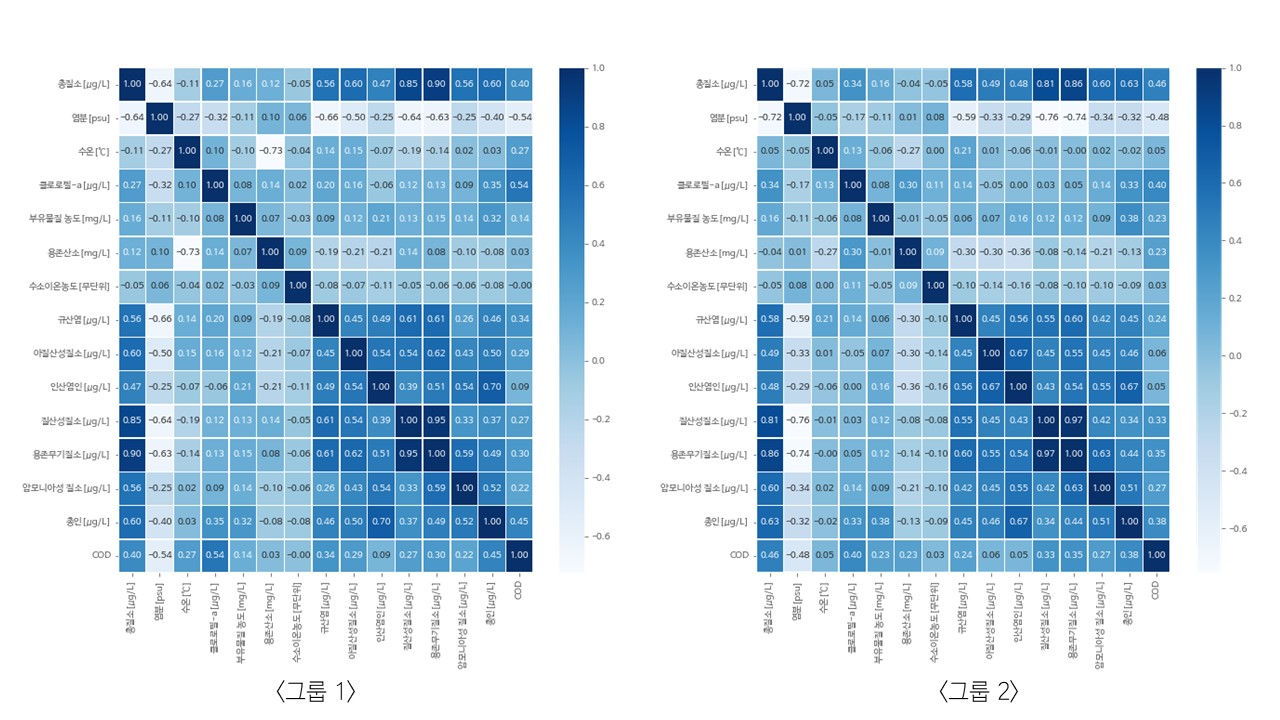

독립변수들 간에 강한 상관관계가 나타나는 **다중공선성 문제를 방지**하기 위해 **변수간 상관관계가 높은 변수들을 제거**해야 합니다.

- 그룹 1, 그룹 2 모두 총질소와 용존무기질소 변수를 모델링에서 제외하였습니다.

## 3.2 COD와 feature의 상관관계

이번에는 COD 에 유의미한 feature를 선별하기 위하여 **독립변수와 COD간 상관관계**를 확인해볼 것입니다.

In [ ]:
# 그룹 1
df_corr28 = df28.drop(columns=['총질소[μg/L]', '용존무기질소[μg/L]', 'station', 'date', 'Longitude [degrees_east]','Latitude [degrees_north]','year', 'month', 'day', 'hour'],axis=1)
scaler= MinMaxScaler()
df_corr28[df_corr28.columns] = scaler.fit_transform(df_corr28[df_corr28.columns])
corr28 = df_corr28.corr(method= 'pearson')

s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['COD'].sort_values(ascending=False), columns=['COD'])
df_temp28.style.background_gradient(cmap='viridis')

# 그룹 2
df_corr511 = df511.drop(columns=['총질소[μg/L]', '용존무기질소[μg/L]', 'station', 'date', 'Longitude [degrees_east]','Latitude [degrees_north]','year', 'month', 'day', 'hour'],axis=1)
scaler= MinMaxScaler()
df_corr511[df_corr511.columns] = scaler.fit_transform(df_corr511[df_corr511.columns])
corr511 = df_corr511.corr(method= 'pearson')

s511 = corr511.unstack()
df_temp511 = pd.DataFrame(s511['COD'].sort_values(ascending=False), columns=['COD'])
df_temp511.style.background_gradient(cmap='viridis')

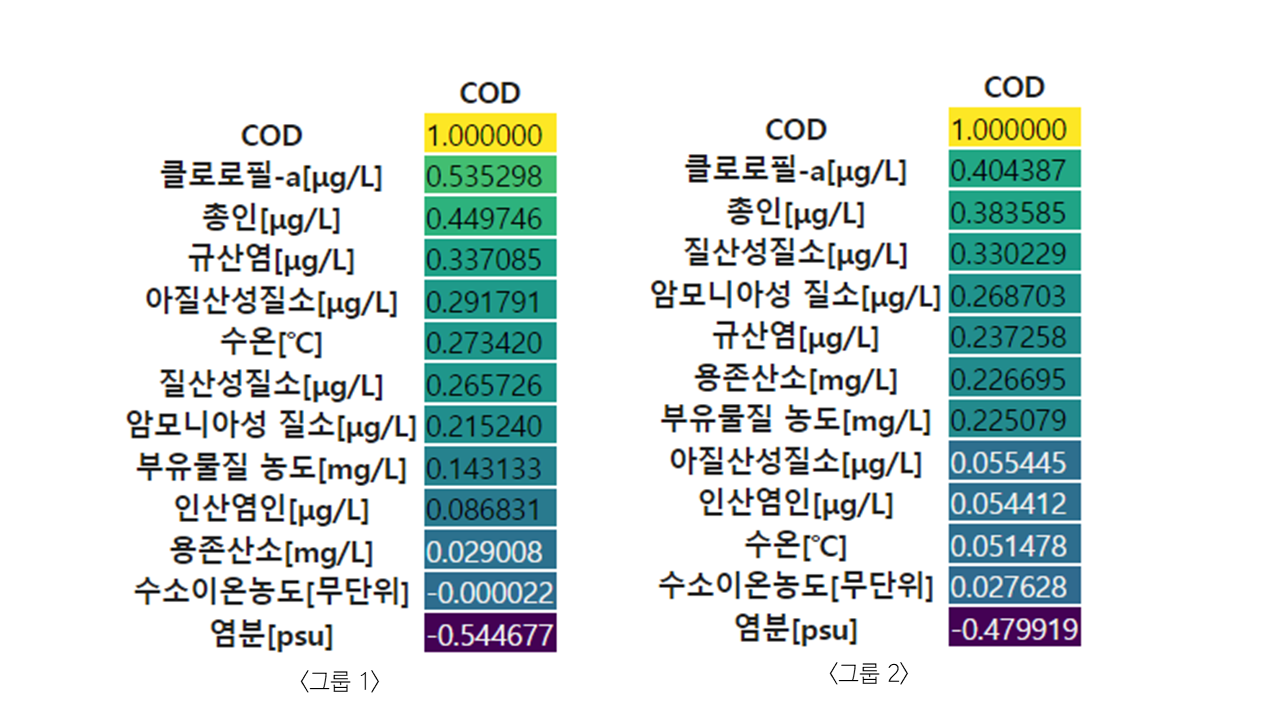

- 그룹 1에서 상관계수가 0.1미만으로 나타난 **'용존산소', '인산염인', '수소이온농도'**는 상관관계가 없다고 판단하여 모델의 feature에서 제거하였습니다.

- 그룹 2에서는 **'인산염인', '아질산성질소', '수온', '수소이온농도'**를 제거하였습니다.

## 3.4 COD 구역별 시각화 그래프

구역별로 매년 COD 증감이 달라지고 있는 것을 그래프로 확인해보았습니다.

Text(0.5, 1.0, '2020년 8월 COD 농도')

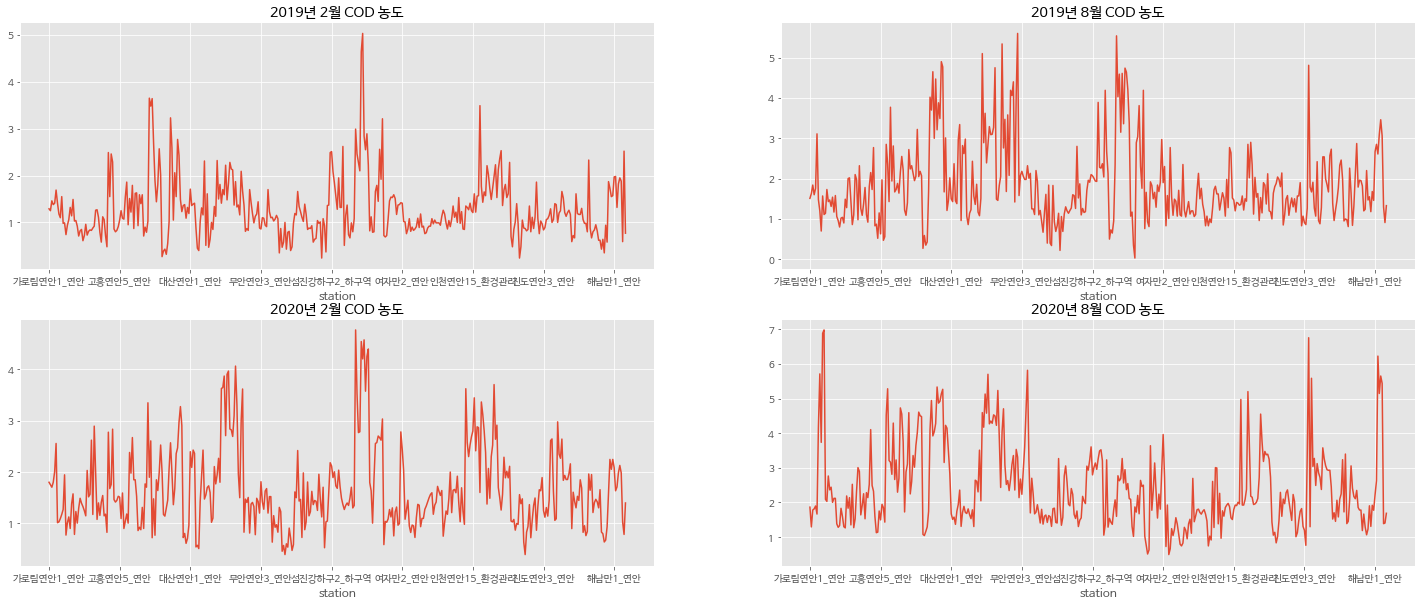

In [ ]:
#19~20년도 2, 8월 COD station 별로 보기
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(25,10)

df28.groupby(['year', 'month', 'station']).mean().loc[2019, 2]['COD'].plot(ax=ax1)
ax1.set_title("2019년 2월 COD 농도")
df28.groupby(['year', 'month', 'station']).mean().loc[2019, 8]['COD'].plot(ax=ax2)
ax2.set_title("2019년 8월 COD 농도")
df28.groupby(['year', 'month', 'station']).mean().loc[2020, 2]['COD'].plot(ax=ax3)
ax3.set_title("2020년 2월 COD 농도")
df28.groupby(['year', 'month', 'station']).mean().loc[2020, 8]['COD'].plot(ax=ax4)
ax4.set_title("2020년 8월 COD 농도")

Text(0.5, 1.0, '2020년 11월 COD 농도')

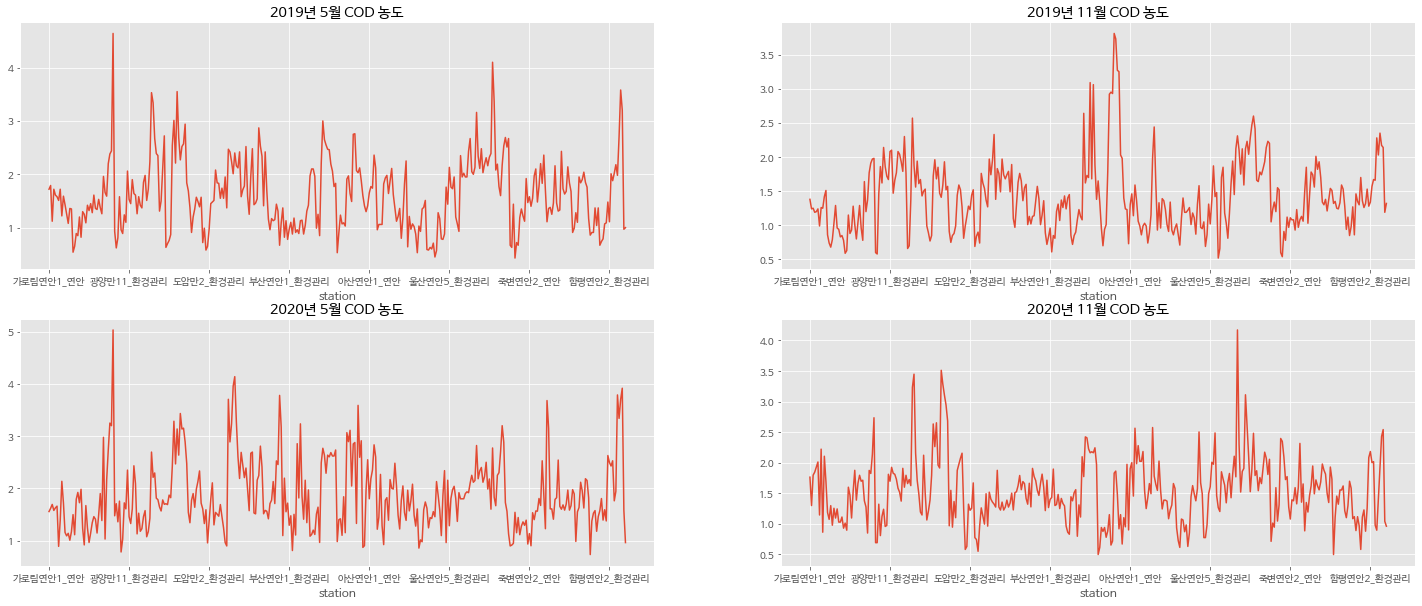

In [ ]:
#19~20년도 5, 11월 COD station 별로 보기
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(25,10)

df511.groupby(['year', 'month', 'station']).mean().loc[2019, 5]['COD'].plot(ax=ax1)
ax1.set_title("2019년 5월 COD 농도")
df511.groupby(['year', 'month', 'station']).mean().loc[2019, 11]['COD'].plot(ax=ax2)
ax2.set_title("2019년 11월 COD 농도")
df511.groupby(['year', 'month', 'station']).mean().loc[2020, 5]['COD'].plot(ax=ax3)
ax3.set_title("2020년 5월 COD 농도")
df511.groupby(['year', 'month', 'station']).mean().loc[2020, 11]['COD'].plot(ax=ax4)
ax4.set_title("2020년 11월 COD 농도")

## 3.5 COD와 선별된 feature 상관관계 시각화 맵

🔻 그룹 1에서 상관관계가 높은 클로로필과 COD를 연안의 구역별로 맵핑해보면 

클로로필의 데이터로 COD를 예측할 수 있을 만큼 높은 상관관계가 나타나고 있음을 확인할 수 있습니다.


빨간색 원 : COD, 보라색 원 : 클로로필


In [ ]:
# 그룹 1 COD와 클로로필 지도 시각화

m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df28.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].index:
    if '1' in i:
      if'2' not in i and '3' not in i and '4' not in i and '5' not in i and '6' not in i and '7' not in i and '11' not in i and '0' not in i:
        folium.Circle(location=df28.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].loc[i], 
                    radius=float(df28.groupby('station').mean()['COD'].loc[i])*5000, 
                    color='#FF3333', fill_color='#FF3333', fill_opacity=0.2, line_opcity=0.2, 
                    tooltip=int(df28.groupby('station').mean()['COD'].loc[i])).add_to(m)

for i in df28.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].index:
    if '1' in i:
      if'2' not in i and '3' not in i and '4' not in i and '5' not in i and '6' not in i and '7' not in i and '11' not in i and '0' not in i:
        folium.Circle(location=df28.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].loc[i], 
                    radius=float(df28.groupby('station').mean()['클로로필-a[μg/L]'].loc[i])*2000, 
                    color='#9933FF', fill_color='#9933FF', fill_opacity=0.2, line_opcity=0.2, 
                    tooltip=int(df28.groupby('station').mean()['클로로필-a[μg/L]'].loc[i])).add_to(m)


m


🔻 그룹 2에서 상관관계가 높은 총인과 COD를 연안의 구역별로 맵핑해보면 

총인의 데이터로 COD를 예측할 수 있을 만큼 높은 상관관계가 나타나고 있음을 확인할 수 있습니다.


빨간색 원 : COD,
초록색 원 : 총인

In [ ]:
# 그룹 2 COD와 총인 지도 시각화

m = folium.Map(location=[36.377247, 128.067197], zoom_start=7, prefer_canvas=True)

for i in df511.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].index:
    if '1' in i:
      if'2' not in i and '3' not in i and '4' not in i and '5' not in i and '6' not in i and '7' not in i and '11' not in i and '0' not in i:
        folium.Circle(location=df511.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].loc[i], 
                    radius=float(df511.groupby('station').mean()['COD'].loc[i])*5000, 
                    color='#FF3333', fill_color='#FF3333', fill_opacity=0.2, line_opcity=0.2, 
                    tooltip=int(df511.groupby('station').mean()['COD'].loc[i])).add_to(m)

for i in df511.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].index:
    if '1' in i:
      if'2' not in i and '3' not in i and '4' not in i and '5' not in i and '6' not in i and '7' not in i and '11' not in i and '0' not in i:
        folium.Circle(location=df511.groupby('station').mean()[['Latitude [degrees_north]', 'Longitude [degrees_east]']].loc[i], 
                    radius=float(df511.groupby('station').mean()['총인[μg/L]'].loc[i])*280, 
                    color='#1BA879', fill_color='#1BA879', fill_opacity=0.2, line_opcity=0.2, 
                    tooltip=int(df511.groupby('station').mean()['총인[μg/L]'].loc[i])).add_to(m)


m

# 4. 모델링

모델링 과정은 그룹 1과 그룹 2가 동일하므로, 설명의 편의를 위해 그룹 1 (2월과 8월) 을 기준으로 설명하겠습니다 ❗

## 4.1 모델링 데이터 프레임



df28 : 선별된 feature와 target 변수를 가진 데이터 셋

sm28 : 년/월/구역 별 데이터 셋

learn28/predict28 : 학습 및 예측시킬 데이터 셋

learn28_sc/predict28_sc : 스케일링된 독립변수 데이터 셋

In [ ]:
columns = df.columns[4:19]

# 선별된 feature와 target index (총질소, 용존무기질소, 용존산소, 인산염인, 수소이온농도 제외)
total28 = columns.drop(['총질소[μg/L]', '용존무기질소[μg/L]', '인산염인[μg/L]', '용존산소[mg/L]', '수소이온농도[무단위]'])

# 선별된 feature index
ft28 = columns.drop(['총질소[μg/L]', '용존무기질소[μg/L]', '인산염인[μg/L]', '용존산소[mg/L]', '수소이온농도[무단위]', 'COD'])

# target index
target = 'COD'

ft28

Index(['염분[psu]', '수온[℃]', '클로로필-a[μg/L]', '부유물질 농도[mg/L]', '규산염[μg/L]',
       '아질산성질소[μg/L]', '질산성질소[μg/L]', '암모니아성 질소[μg/L]', '총인[μg/L]'],
      dtype='object')

In [ ]:
# 선별된 feature의 수
len(ft28)

9

In [ ]:
# 선별된 feature와 target을 가진 그룹1(2,8월) 데이터프레임
df28 = df28[total28]
df28

station                date  Longitude [degrees_east]  \
0     가로림연안1_연안 2015-02-15 00:00:00                126.326944   
8     가로림연안2_연안 2015-02-15 00:00:00                126.313333   
16    가로림연안3_연안 2015-02-15 00:00:00                126.200000   
24    가로림연안4_연안 2015-02-15 00:00:00                126.333611   
32    가로림연안5_연안 2015-02-15 00:00:00                126.322500   
...         ...                 ...                       ...   
3130  행암만3_환경관리 2020-08-05 16:16:00                128.679720   
3138  행암만4_환경관리 2020-08-05 16:03:00                128.687780   
3146   후포연안1_연안 2020-08-17 13:46:00                129.458889   
3154   후포연안2_연안 2020-08-17 12:27:00                129.483611   
3160  후포연안H1_항만 2020-08-17 12:53:00                129.457778   

      Latitude [degrees_north]  염분[psu]    수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  \
0                    36.946389  32.0841   3.5593         1.092          16.20   
8                    36.990000  32.0735   3.7966         0.996          17.40   
16                   36.941667  32.0572   3.8867         1.088          20.80   
24                   36.922500  32.0980   3.4265         1.020          15.20   
32                   36.970833  32.0889   3.6491         0.924          10.60   
...                        ...      ...      ...           ...            ...   
3130                 35.144440  20.4961  27.4106        23.200           9.10   
3138                 35.146110  24.7374  23.5298        34.920           9.10   
3146                 36.647500  32.1025  22.0892         0.810           6.45   
3154                 36.694444  32.3917  21.1699         0.940          11.30   
3160                 36.678333  31.8048  21.0931         1.752           5.55   

      규산염[μg/L]  아질산성질소[μg/L]  질산성질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]      COD  \
0       375.600         1.792      190.232           1.988   41.7409  1.49709   
8       384.500         1.834      197.204           2.254   42.4892  1.31546   
16      383.900         1.708      197.330           2.828   43.9692  1.49709   
24      368.700         1.890      168.588           2.422   40.5083  1.43104   
32      374.100         1.386      174.818           1.960   36.3168  1.24941   
...         ...           ...          ...             ...       ...      ...   
3130    792.904        26.334      267.022          67.592   65.9370  5.65278   
3138    789.432        14.154      118.062          87.948   78.0270  5.44040   
3146     82.712         0.140        1.694           3.276    8.8970  1.38667   
3154     81.536         0.210        4.046           6.104    9.1140  1.40331   
3160     94.164         0.084        2.338          20.874   14.0740  1.68619   

      year  month  day  hour  
0     2015      2   15     0  
8     2015      2   15     0  
16    2015      2   15     0  
24    2015      2   15     0  
32    2015      2   15     0  
...    ...    ...  ...   ...  
3130  2020      8    5    16  
3138  2020      8    5    16  
3146  2020      8   17    13  
3154  2020      8   17    12  
3160  2020      8   17    12  

[4918 rows x 18 columns]

### 4.1.1 target 설정

2015년 2월부터 2020년 8월까지 구역별로 묶어 target을 설정하기위하여 'sm28' 데이터 프레임을 생성하였습니다.

In [ ]:
# 년, 월, 구역별 묶여진 그룹1(2,8월) 데이터프레임
sm28 = df28.groupby(['year', 'month', 'station'])[total28].mean()
sm28

염분[psu]    수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  \
year month station                                                    
2015 2     가로림연안1_연안  32.0841   3.5593         1.092          16.20   
           가로림연안2_연안  32.0735   3.7966         0.996          17.40   
           가로림연안3_연안  32.0572   3.8867         1.088          20.80   
           가로림연안4_연안  32.0980   3.4265         1.020          15.20   
           가로림연안5_연안  32.0889   3.6491         0.924          10.60   
...                       ...      ...           ...            ...   
2020 8     행암만3_환경관리  20.4961  27.4106        23.200           9.10   
           행암만4_환경관리  24.7374  23.5298        34.920           9.10   
           후포연안1_연안   32.1025  22.0892         0.810           6.45   
           후포연안2_연안   32.3917  21.1699         0.940          11.30   
           후포연안H1_항만  31.8048  21.0931         1.752           5.55   

                      규산염[μg/L]  아질산성질소[μg/L]  질산성질소[μg/L]  암모니아성 질소[μg/L]  \
year month station                                                           
2015 2     가로림연안1_연안    375.600         1.792      190.232           1.988   
           가로림연안2_연안    384.500         1.834      197.204           2.254   
           가로림연안3_연안    383.900         1.708      197.330           2.828   
           가로림연안4_연안    368.700         1.890      168.588           2.422   
           가로림연안5_연안    374.100         1.386      174.818           1.960   
...                         ...           ...          ...             ...   
2020 8     행암만3_환경관리    792.904        26.334      267.022          67.592   
           행암만4_환경관리    789.432        14.154      118.062          87.948   
           후포연안1_연안      82.712         0.140        1.694           3.276   
           후포연안2_연안      81.536         0.210        4.046           6.104   
           후포연안H1_항만     94.164         0.084        2.338          20.874   

                      총인[μg/L]      COD  
year month station                       
2015 2     가로림연안1_연안   41.7409  1.49709  
           가로림연안2_연안   42.4892  1.31546  
           가로림연안3_연안   43.9692  1.49709  
           가로림연안4_연안   40.5083  1.43104  
           가로림연안5_연안   36.3168  1.24941  
...                        ...      ...  
2020 8     행암만3_환경관리   65.9370  5.65278  
           행암만4_환경관리   78.0270  5.44040  
           후포연안1_연안     8.8970  1.38667  
           후포연안2_연안     9.1140  1.40331  
           후포연안H1_항만   14.0740  1.68619  

[4908 rows x 10 columns]

In [ ]:
# 2월 -> 내년 2월, 12개월씩 shift된 yhat
sm28['yhat'] = sm28['COD'].shift(-818)

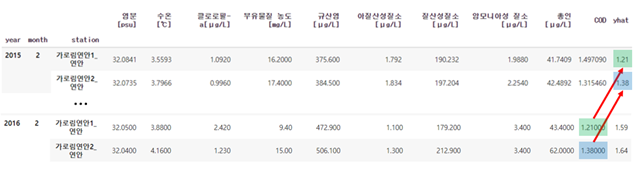

2월, 8월의 데이터로 **12개월 후를 예측하는 모델**을 만들기 위해 **12개월 후의 COD를 target으로 설정**해주었습니다.

2월과 8월의 구역이 409개이므로 818개의 행을 shift 해주면 12개월 후의 행이 대입됩니다.

(예시로 2015년 2월의 target은 2016년 2월의 COD)

### 4.1.2 학습 및 예측시킬 데이터 셋 분리

이후 기존의 COD열을 삭제하고 **학습**시킬 데이터 셋과 **예측**시킬 데이터 셋으로 분리하였습니다.

In [ ]:
#학습시킬 테이블
learn28 = sm28[sm28['yhat'].notnull()]
learn28 = learn28.drop(['COD'], axis=1)

#COD yhat 예측시킬 테이블 
predict28 = sm28[sm28['yhat'].isnull()]
predict28 = predict28.drop(["COD"], axis=1)

learn28.head()

염분[psu]   수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  규산염[μg/L]  \
year month station                                                              
2015 2     가로림연안1_연안  32.0841  3.5593         1.092           16.2      375.6   
           가로림연안2_연안  32.0735  3.7966         0.996           17.4      384.5   
           가로림연안3_연안  32.0572  3.8867         1.088           20.8      383.9   
           가로림연안4_연안  32.0980  3.4265         1.020           15.2      368.7   
           가로림연안5_연안  32.0889  3.6491         0.924           10.6      374.1   

                      아질산성질소[μg/L]  질산성질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]  \
year month station                                                          
2015 2     가로림연안1_연안         1.792      190.232           1.988   41.7409   
           가로림연안2_연안         1.834      197.204           2.254   42.4892   
           가로림연안3_연안         1.708      197.330           2.828   43.9692   
           가로림연안4_연안         1.890      168.588           2.422   40.5083   
           가로림연안5_연안         1.386      174.818           1.960   36.3168   

                      yhat  
year month station          
2015 2     가로림연안1_연안  1.21  
           가로림연안2_연안  1.38  
           가로림연안3_연안  1.23  
           가로림연안4_연안  1.04  
           가로림연안5_연안  1.47

In [ ]:
predict28.head()

염분[psu]   수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  규산염[μg/L]  \
year month station                                                              
2020 2     가로림연안1_연안  31.7594  5.5484         1.740          22.60    367.332   
           가로림연안2_연안  31.8122  5.7934         1.292          40.30    391.300   
           가로림연안3_연안  31.8133  5.8103         1.000          35.50    399.168   
           가로림연안4_연안  31.7089  5.3150         3.760           6.65    323.148   
           가로림연안5_연안  31.8108  5.7913         1.428          51.31    389.732   

                      아질산성질소[μg/L]  질산성질소[μg/L]  암모니아성 질소[μg/L]  총인[μg/L]  \
year month station                                                          
2020 2     가로림연안1_연안         1.470      137.298           4.312    39.153   
           가로림연안2_연안         1.484      163.170           4.676    49.476   
           가로림연안3_연안         1.106      176.554           2.478    50.251   
           가로림연안4_연안         1.344       87.304           2.730    29.667   
           가로림연안5_연안         1.372      163.478           4.158    47.492   

                      yhat  
year month station          
2020 2     가로림연안1_연안   NaN  
           가로림연안2_연안   NaN  
           가로림연안3_연안   NaN  
           가로림연안4_연안   NaN  
           가로림연안5_연안   NaN

예측값을 넣어 주기 위하여 yhat이 NaN 행을 가진 'predict28' 데이터 프레임을 확인 할 수 있습니다.

이는 차후에 모델을 생성시 2020년 2월 feature를 넣으면 **yhat에 2021년 2월 COD 예측값**을 넣을 것이라는 것을 확인할 수 있습니다.

### 4.1.3 스케일링

학습 및 예측 시킬 데이터 셋에서 모델을 생성해주기 위하여 feature를 스케일링해 주었습니다.

In [ ]:
# 독립변수 스케일링

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

learn_sc28 = sc.fit_transform(learn28.loc[:, ft28])
learn_sc28 = pd.DataFrame(learn_sc28, columns=[ft28], index=learn28.loc[:, ft28].index)

predict_sc28 = sc.fit_transform(predict28.loc[:, ft28])
predict_sc28 = pd.DataFrame(predict_sc28, columns=[ft28], index=predict28.loc[:, ft28].index)

learn_sc28.head()

염분[psu]     수온[℃] 클로로필-a[μg/L] 부유물질 농도[mg/L] 규산염[μg/L]  \
year month station                                                              
2015 2     가로림연안1_연안  0.925198  0.141433     0.008411      0.076826  0.111175   
           가로림연안2_연안  0.924892  0.148714     0.007672      0.082518  0.113812   
           가로림연안3_연안  0.924420  0.151479     0.008380      0.098648  0.113634   
           가로림연안4_연안  0.925600  0.137358     0.007856      0.072082  0.109130   
           가로림연안5_연안  0.925337  0.144188     0.007117      0.050259  0.110730   

                     아질산성질소[μg/L] 질산성질소[μg/L] 암모니아성 질소[μg/L]  총인[μg/L]  
year month station                                                      
2015 2     가로림연안1_연안     0.010554    0.091088       0.000769  0.160354  
           가로림연안2_연안     0.010801    0.094426       0.000872  0.163629  
           가로림연안3_연안     0.010059    0.094487       0.001094  0.170106  
           가로림연안4_연안     0.011131    0.080724       0.000937  0.154960  
           가로림연안5_연안     0.008163    0.083707       0.000758  0.136616

모델링을 위해 사용한 해양환경측정망 데이터는 특이값이 있다 하더라도 이상치가 아니라고 판단했기 때문에 RobustScaler와 MinMaxScaler를 비교해 보았을 때, **MinMaxScaler**가 모델 성능을 더 향상시킨다고 판단하여 이를 사용했습니다.

## 4.2 모델 선정

우선 모델 선정 결과를 보시면 다음과 같습니다.

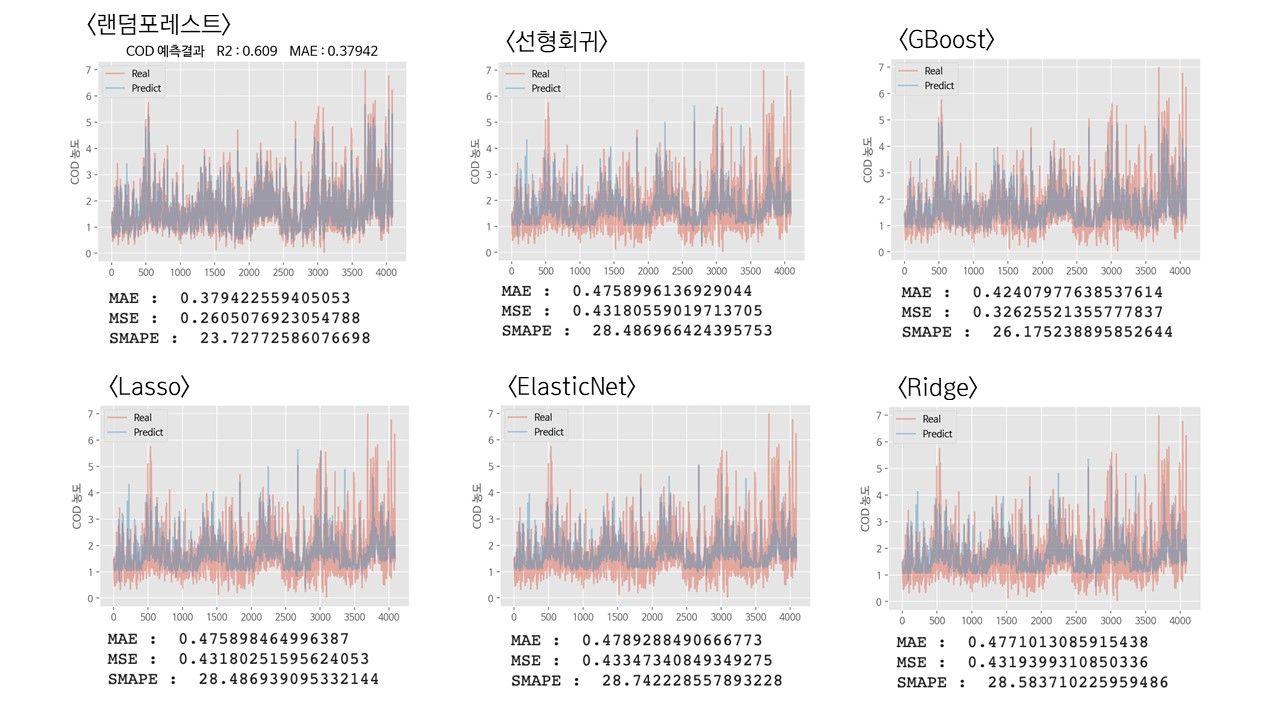

여러 머신러닝 모델들의 성능을 비교해 보았을 때 랜덤포레스트 모델이 가장 예측 성능이 좋다는 것을 확인하였습니다.

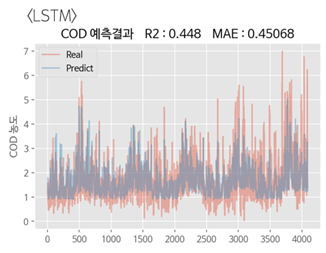

딥러닝 LSTM의 예측 결과를 살펴보면, 각각의 구역에 대한 **시계열을 정확하게 반영할 수 있는 데이터프레임이 아니기에** 

LSTM모델이 시계열을 제대로 반영하여 학습을 하지 못해 성능이 좋지 않았습니다.  

따라서 저희는 가장 성능이 좋은 **랜덤포레스트를 모델로 선정**하였습니다.

## 4.3 랜덤포레스트 모델

여러 개의 결정트리들을 임의적으로 학습하는 ‘배깅’(Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘) 방식의 대표적인 알고리즘입니다.  
의사결정나무의 특징인 분산이 크다는 점을 고려하여 더 많은 무작위성을 주고,   
**약한 학습기들을 생성한 후 이를 선형 결합하여 최종 학습기를 만드는 랜덤포레스트**를 선택하여 모델링에 사용하였습니다.

> 특히 랜덤포레스트는 데이터셋의 다양한 하위 샘플에 대한 여러 개의 의사결정나무에서의 평균을 사용하여 예측 정확도를 높이고 오버피팅을 제어합니다.




In [ ]:
#랜덤 포레스트
X = learn_sc28
y = learn28['yhat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=12345678)

with tf.device('/device:GPU:0'):
  model = RandomForestRegressor()
  model.fit(X_train, y_train)

y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print('R2 :' , R2) 
print('MAE :', MAE) 

R2 : 0.599939330976891
MAE : 0.3850762722071836


## 4.4 하이퍼 파라미터 튜닝

랜덤 포레스트 성능을 높이기 위하여 하이퍼 파라미터를 튜닝하였습니다.

In [ ]:
#하이퍼 파리미터 튜닝
from sklearn.model_selection import GridSearchCV

params =[
        {'n_estimators': [50, 80, 100], 'max_features': [5, 6, 7, 8, 9]}
    ]

rf_model28 = RandomForestRegressor()
rf_model28 = GridSearchCV(rf_model28, param_grid=params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rf_model28.fit(X_train,y_train)
rf_model28.best_params_

{'max_features': 5, 'n_estimators': 100}

In [ ]:
cvres = rf_model.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(round(np.sqrt(-mean_score),3), params)

0.584 {'max_features': 5, 'n_estimators': 50}
0.58 {'max_features': 5, 'n_estimators': 80}
0.578 {'max_features': 5, 'n_estimators': 100}
0.581 {'max_features': 6, 'n_estimators': 50}
0.579 {'max_features': 6, 'n_estimators': 80}
0.579 {'max_features': 6, 'n_estimators': 100}
0.581 {'max_features': 7, 'n_estimators': 50}
0.581 {'max_features': 7, 'n_estimators': 80}
0.578 {'max_features': 7, 'n_estimators': 100}
0.579 {'max_features': 8, 'n_estimators': 50}
0.582 {'max_features': 8, 'n_estimators': 80}
0.581 {'max_features': 8, 'n_estimators': 100}
0.583 {'max_features': 9, 'n_estimators': 50}
0.58 {'max_features': 9, 'n_estimators': 80}
0.578 {'max_features': 9, 'n_estimators': 100}


이때 RMSE 점수 : 0.578 {'max_features': 5, 'n_estimators': 100}

가장 우수한 성능을 보이는 모델의 하이퍼 파라미터를 찾기 위해서 Grid search(격자탐색)을 이용해 하이퍼 파라미터 튜닝 과정을 진행했습니다.   
(하이퍼 파라미터: 결정트리 개수(max_feature), 최적의 분할을 위해 고려할 최대 feature 개수(n_estimators))

> **Grid search (격자 탐색)** 은 모델 하이퍼 파라미터에 넣을 수 있는 값들을 순차적으로 입력한 뒤에 가장 높은 성능을 보이는 하이퍼 파라미터들을 찾는 탐색 방법




## 4.5 예측 결과

### 4.5.1 그룹 1 예측결과

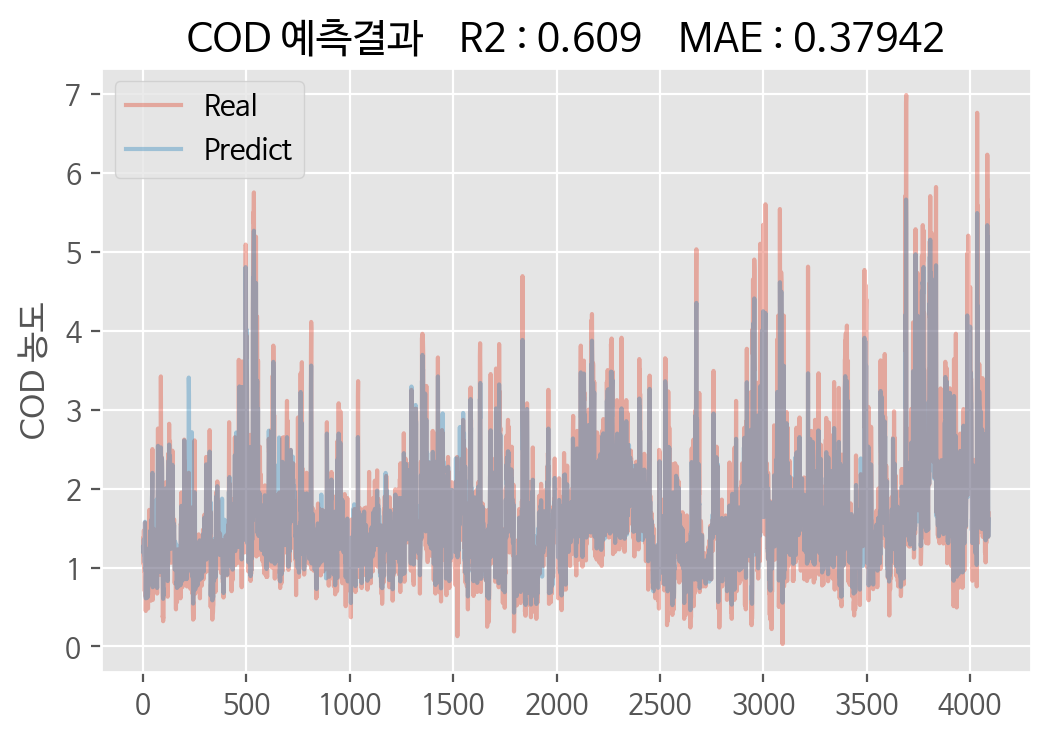

In [ ]:
y_pred28 = rf_model28.predict(X_test)
R2 = r2_score(y_test, y_pred28)
MAE = mean_absolute_error(y_test, y_pred28)

plt.figure(dpi=200)
plt.title('COD 예측결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('COD 농도')
plt.plot(np.array(y), alpha = 0.4, label = 'Real')
plt.plot(rf_model28.predict(X), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

일반적으로 결정계수 값의 크기에 대해서 자연과학 및 공학 등에서는 70%을 기준으로 모델을 평가합니다. 

예측 모델의 R^2값은 0.609로 0.7에 못 미치는 값을 가지고 있지만,

R^2값은 모형이 설명하는 변동의 비를 나타내기 때문에 자료의 편차가 클수록 R^2값은 작아질 수 밖에 없습니다.

따라서 R^2만으로 신뢰성을 판단해선 안되므로 **그래프 추세와 다른 평가지표를 확인하여 COD에 미치는 영향은 여전히 유의**하다고 볼 수 있습니다.

In [ ]:
MAE = mean_absolute_error(y_test, y_pred28)
#MAE는 실제 관측값과 회귀식으로 예측한 값 차이를 제곱 합이 아닌 절대값의 합

MSE = mean_squared_error(y_test, y_pred28)
#MSE는 SSE를 자유도로 나누어준 값이다. 
#자유도를 나누어 줌으로써 MSE가 크다의 의미는 단순히 데이터가 많아서 크다는 것이 아니라(SSE는 데이터 수가 많아지면 커진다.) 실제 차이가 커서 크다고 판단할 수 있게 되는 것이다.

def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

SMAPE = smape(y_test, y_pred28)

print('MAE : ', MAE)
print('MSE : ', MSE)
print('SMAPE : ', SMAPE)

MAE :  0.379422559405053
MSE :  0.2605076923054788
SMAPE :  23.72772586076698


다른 평가지표를 통해 살펴보면 모델의 **MAE는 0.37, MSE는 0.26, SMAPE는 23.7%**로 유의미한 모델이라는 것을 확인하였습니다.

마지막에 진행할 결과 분석에서 **COD의 증감비율을 활용**하기 때문에 이와 같은 단위인 **퍼센트(%)를 사용하는 SMAPE에 주목**하였습니다. 


> 우선 **평균 절대 백분율 오차(MAPE)**는 MAE에서 실제 관측값과 회귀식으로 예측한 값 차이를 회귀식으로 예측한 값으로 나눈 절대값의 합입니다. 0이나 0에 근접한 데이터가 포함되는 경우엔 MAPE는 전체 오류율을 왜곡시키므로 **해당 모델에서는 SMAPE**가 더 적합한 지표로 사용됩니다.

> **Symmetric mean absolute percentage error (SMAPE 또는 sMAPE)**는 백분율(퍼센티지, 또는 상대) 오류를 기반으로 한 정확도 측정 방법입니다.  
MAPE와 달리 SMAPE엔 상한과 하한이 있습니다. SMAPE의 이러한 값의 제한은 MAPE에서 발생하는 오류율의 왜곡을 막아줍니다. SMAPE에도 한계가 있는데 실제 값 또는 예측 값이 0인 경우 오류 값이 오류의 상한값까지 상승한다는 것입니다.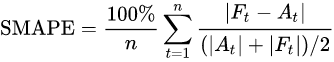

### 4.5.2 그룹 2 예측결과

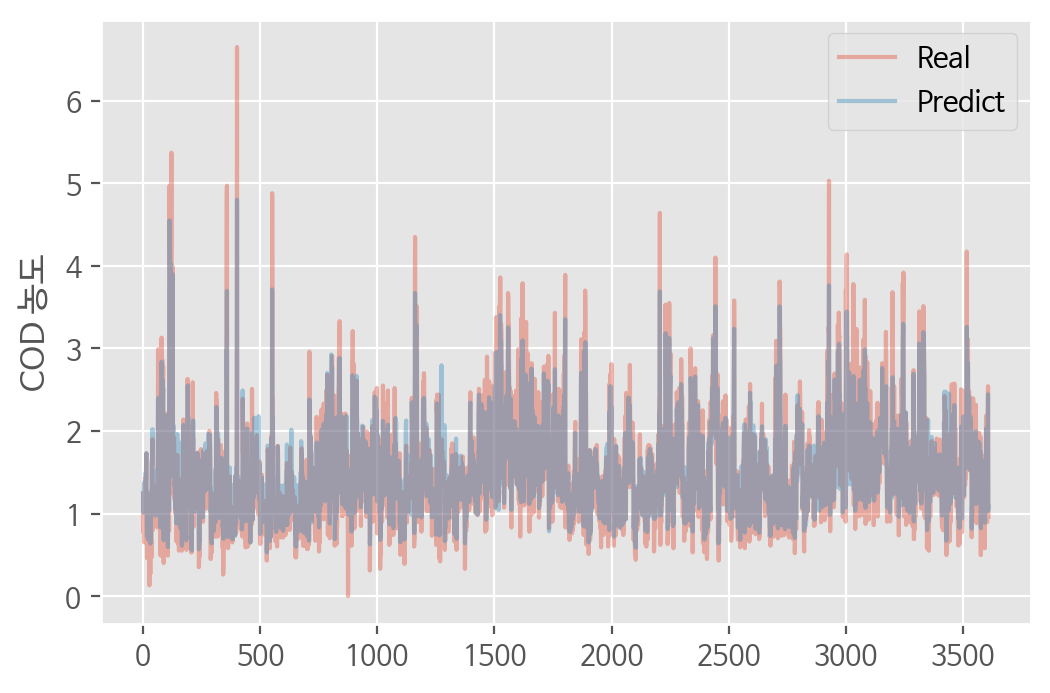

In [ ]:
y_pred511 = rf_model511.predict(X_test)
plt.figure(dpi=200)
plt.ylabel('COD 농도')
plt.plot(np.array(y), alpha = 0.4, label = 'Real')
plt.plot(rf_model511.predict(X), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
MAE = mean_absolute_error(y_test, y_pred511)

MSE = mean_squared_error(y_test, y_pred511)

def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

SMAPE = smape(y_test, y_pred511)

print('MAE : ', MAE)
print('MSE : ', MSE)
print('SMAPE : ', SMAPE)

MAE :  0.3347379216721079
MSE :  0.21172963067052405
SMAPE :  23.11448774797975


**그룹 2 모델도 MAE는 0.33, MSE는 0.21, SMAPE는 23.1%**로 유의미한 모델이라는 것을 확인하였습니다.

### 4.5.3 12개월 이후 yhat 예측

이제  'predict28' 데이터프레임을 이용하여 앞서 만든 모델에 2020년 2월, 8월 구역별 feature를 대입하였습니다.

그 결과 2021년 2월, 8월에 구역별 COD 를 예측하는 yhat 을 도출 할 수 있었습니다.

In [ ]:
#12개월 후 값 예측하여 값 저장
newpred = rf_model.predict(predict_sc28)

#기존 yhat이 NaN 행에  예측 값 넣어주기
predict28['yhat'] = newpred
predict28

염분[psu]    수온[℃]  클로로필-a[μg/L]  부유물질 농도[mg/L]  \
year month station                                                    
2020 2     가로림연안1_연안  31.7594   5.5484         1.740          22.60   
           가로림연안2_연안  31.8122   5.7934         1.292          40.30   
           가로림연안3_연안  31.8133   5.8103         1.000          35.50   
           가로림연안4_연안  31.7089   5.3150         3.760           6.65   
           가로림연안5_연안  31.8108   5.7913         1.428          51.31   
...                       ...      ...           ...            ...   
     8     행암만3_환경관리  20.4961  27.4106        23.200           9.10   
           행암만4_환경관리  24.7374  23.5298        34.920           9.10   
           후포연안1_연안   32.1025  22.0892         0.810           6.45   
           후포연안2_연안   32.3917  21.1699         0.940          11.30   
           후포연안H1_항만  31.8048  21.0931         1.752           5.55   

                      규산염[μg/L]  아질산성질소[μg/L]  질산성질소[μg/L]  암모니아성 질소[μg/L]  \
year month station                                                           
2020 2     가로림연안1_연안    367.332         1.470      137.298           4.312   
           가로림연안2_연안    391.300         1.484      163.170           4.676   
           가로림연안3_연안    399.168         1.106      176.554           2.478   
           가로림연안4_연안    323.148         1.344       87.304           2.730   
           가로림연안5_연안    389.732         1.372      163.478           4.158   
...                         ...           ...          ...             ...   
     8     행암만3_환경관리    792.904        26.334      267.022          67.592   
           행암만4_환경관리    789.432        14.154      118.062          87.948   
           후포연안1_연안      82.712         0.140        1.694           3.276   
           후포연안2_연안      81.536         0.210        4.046           6.104   
           후포연안H1_항만     94.164         0.084        2.338          20.874   

                      총인[μg/L]      yhat  
year month station                        
2020 2     가로림연안1_연안    39.153  1.620365  
           가로림연안2_연안    49.476  1.444914  
           가로림연안3_연안    50.251  1.504549  
           가로림연안4_연안    29.667  1.537063  
           가로림연안5_연안    47.492  1.527814  
...                        ...       ...  
     8     행암만3_환경관리    65.937  3.592177  
           행암만4_환경관리    78.027  3.279105  
           후포연안1_연안      8.897  1.479970  
           후포연안2_연안      9.114  1.333290  
           후포연안H1_항만    14.074  1.934910  

[818 rows x 10 columns]

# 6. 결론

## 5.1 결과해석

### 5.1.1 예측 COD 추세 시각화

실제 구역별 COD와 **예측한 COD** 추세를 시각화 해보았습니다.

좌 (빨간선 그래프) : 2019, 2020 2월 실제 COD

우 (주황선 그래프) : 2021 2월 예측 COD

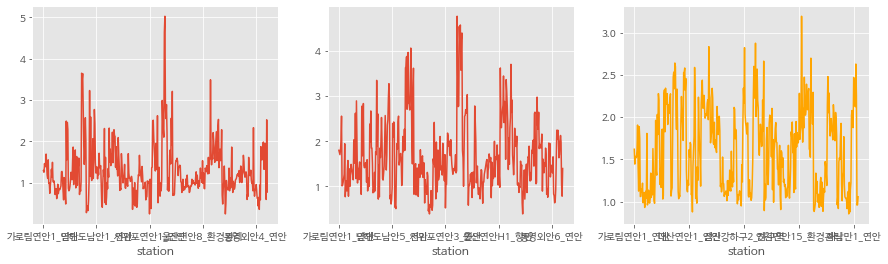

In [ ]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(15,4)
df.groupby(['year', 'month', 'station']).mean().loc[2019, 2]['COD'].plot(ax=ax1)
df.groupby(['year', 'month', 'station']).mean().loc[2020, 2]['COD'].plot(ax=ax2)
predict28.groupby(['year', 'month', 'station']).mean().loc[2020, 2]['yhat'].plot(ax=ax3, color = 'orange')

### 5.1.2 2020-2021 COD 증감 비율

특별관리해역 선정을 위한 **실제 2020년도 2월 COD에서 예측한 2021년도 2월 COD의 증감 비율**을 확인할 것 입니다.

In [ ]:
#2020년 2월
twenty = df28.groupby(['year', 'month', 'station']).mean().loc[2020, 2]['COD']

#2021년 2월
twentyone = predict28.groupby(['year', 'month', 'station']).mean().loc[2020, 2]['yhat']

nt = pd.concat([twenty,twentyone], axis=1)
nt = nt.T.pct_change()*100
nt = nt.drop(index='COD', axis=0)
nt = nt.rename(index={'yhat': '20-21증감비율'})
nt = nt.T.sort_values(by=['20-21증감비율'], ascending=False)

**그룹 1**에서 2020년에서 2021년까지의 COD 증감비율이 가장 높은 **상위 10개**의 연안을 살펴보면 위와 같습니다.

In [ ]:
nt.head(10) ## 2, 8월

20-21증감비율
station               
군산연안5_연안    237.991953
군산연안3_연안    224.292440
목포연안5_연안    188.409366
부산연안3_환경관리  187.051277
목포연안1_연안    169.381439
부산연안8_환경관리  163.784609
광양만9_환경관리   153.410469
목포연안H1_항만   148.850743
부산연안1_환경관리  141.337576
주문진연안3_연안   137.862954


COD증감비율이 가장 높은 ‘군산연안5연안’은 237%로 큰 폭으로 증가한다는 것을 알 수 있습니다.  
**240%에 가까운 증가율**을 보이는 가운데 **23%의 SMAPE를 갖는 것은 예측 결과에 큰 영향을 미치는 오차가 아니라고 판단**하여

**모델의 예측이 충분히 신뢰**할 수 있다고 판단하였습니다.

**그룹 2**에서 2020년에서 2021년까지의 COD 증감비율이 가장 높은 상위 10개의 연안을 살펴보면 위와 같습니다.

In [ ]:
nt2.head(10) ## 5, 11월

20-21증감비율
station                
부산연안3_환경관리   212.523324
가막만1_환경관리    190.611237
고흥연안5_연안     185.600854
여수연안1_연안     181.116504
죽변연안3_연안     165.482335
득량만5_환경관리    156.577996
부산연안14_환경관리  136.823034
울산연안3_환경관리   118.963769
통영외안1_연안     118.004448
진해만5_연안      117.377549

마찬가지로 COD증감비율이 가장 높은 ‘부산연안3_환경관리’은 212%로 큰 폭으로 증가한다는 것을 알 수 있습니다.

**23%의 SMAPE를 갖는 것은 예측 결과에 큰 영향을 미치는 오차가 아니라고 판단**하여 **모델의 예측이 충분히 신뢰**할 수 있다고 판단하였습니다.

### 5.1.3 특별관리해역 선정 맵핑

앞서 선정한 그룹1과 그룹2에서 COD 증감폭이 가장 큰 구역 10군데를  맵핑 해보았습니다.

초록: 그룹 1 증감비율 상위 10개 해역  
빨강: 그룹 2 증감비율 상위 10개 해역

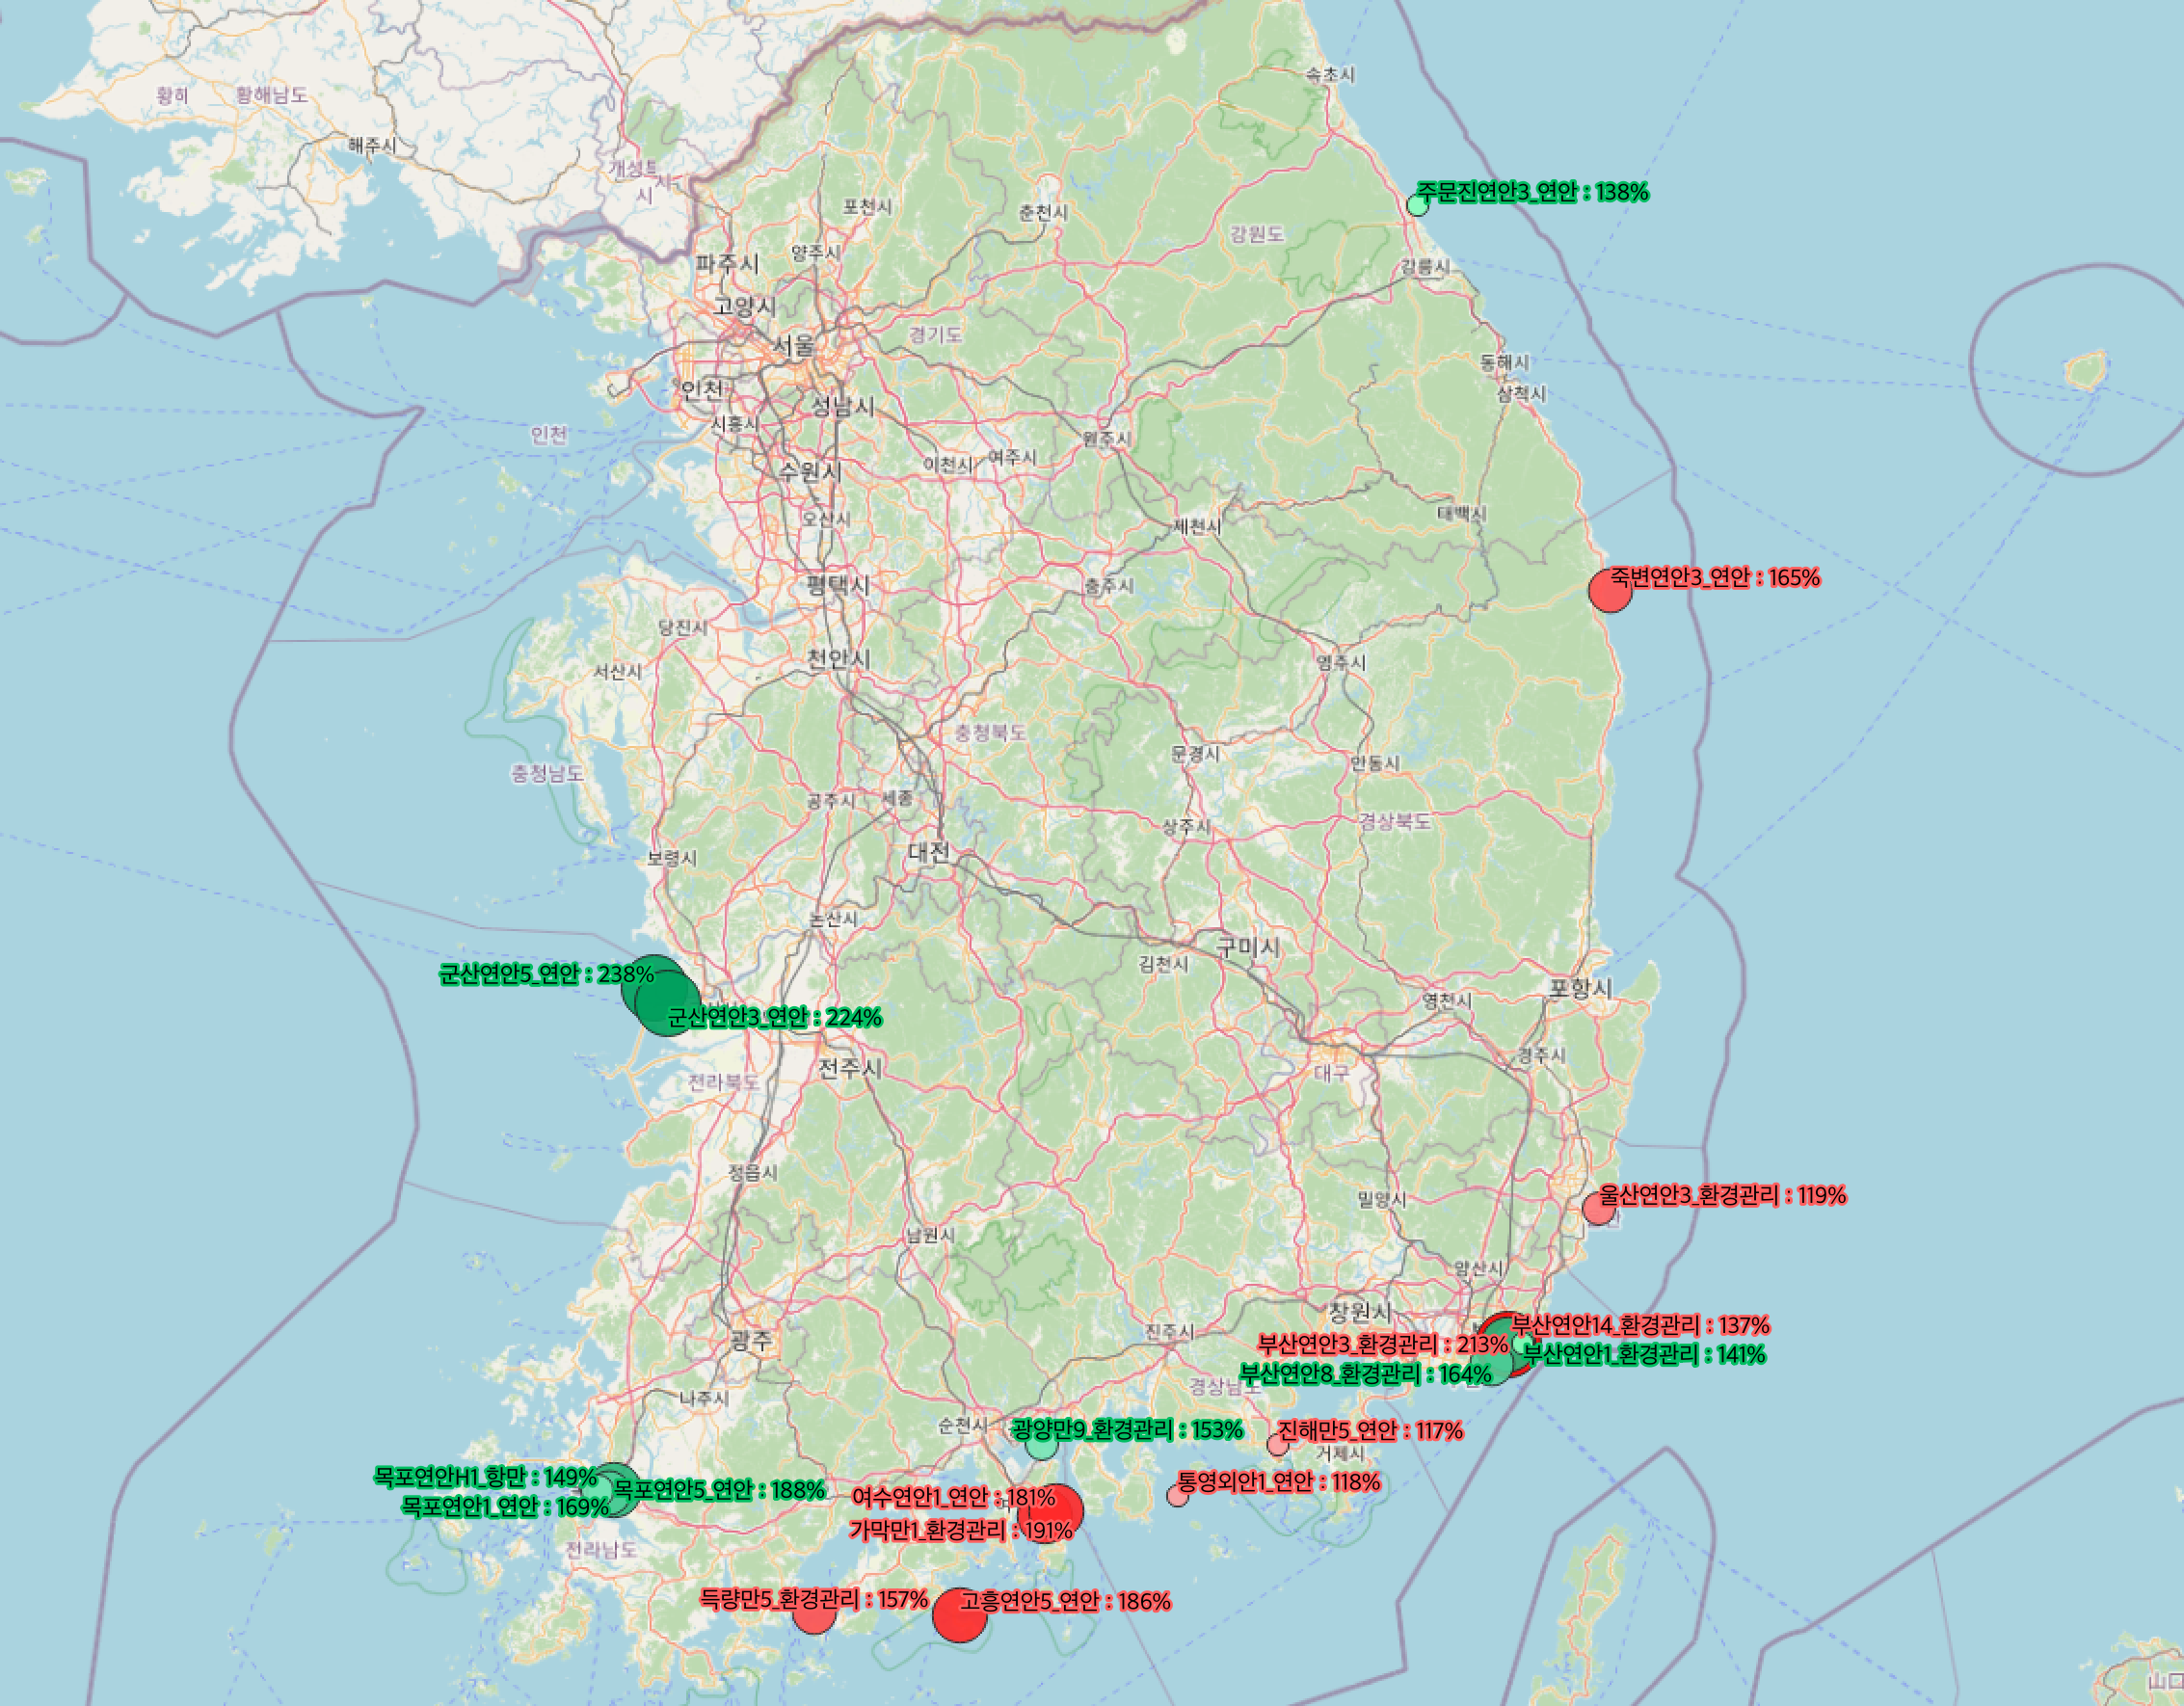

그룹 1(2,8월), 그룹 2(5,11월)의 2021년 COD 증감비율을 살펴본 결과 **군산연안5_연안의 COD가 가장 큰 폭으로 증가한다**는 것을 알 수 있었습니다.

이에 가장 높은 COD 증가를 갖는 군산연안5_연안을 특별관리해역으로 선정하여 각종 오염원의 바다유입 사전차단, 환경기초시설 확충 등의 관리를 통해 해양오염을 사전에 방지할 수 있습니다. 
또한, 그 외의 결과도 근접한 해역끼리 나타나는 경우가 많으므로 추가적인 관리가 가능합니다.


## 5.2 활용방안

본 팀의 COD 예측 모델을 통해 COD가 증가할 것으로 예상되는 지역을 **새로운 특별관리해역으로 선정**해 해양오염 발생 가능성이 큰 해역의 **환경 보전, 오염 예방**이 이뤄질 수 있습니다.  

또한, 위의 지도를 보면 광양만, 부산연안 등 기존 환경관리해역도 2021년에 높은 증가율을 보입니다. 특별관리해역의 미래 COD 변동을 살펴본 후, 기존 해양환경관리정책을 보완, 강화하는 동시에 새로운 관리 정책을 수립하는 등 **향후 정책 방향을 제시하는 근거자료로도 활용**될 수 있습니다.  
이를 통해 해양환경을 체계적으로 보전, 관리하는 것이 가능하기 때문에,  **해양환경이 지속적으로 악화되는 것을 예방**할 수 있습니다.

환경관리해역의 관리목표 달성을 위해  ‘지속가능성의 원칙, 생태계 중심 관리의 원칙, 사전예방적 관리의 원칙, 통합관리의 원칙, 의견수렴 및 동반자적 협력관리의 원칙’ 을 5대 기본원칙으로 제시하고 있습니다(KMI, 2012).  
해당 모델은 기본 원칙 중 **‘사전 예방적 관리의 원칙'**을 뒷받침하는 모델로 활용될 수 있으리라 생각합니다.


## 5.3 한계 및 시사점

해양수산부에서 선정한 특별관리해역은 2000년부터 **부산연안, 울산연안, 광양만, 마산만, 시화호/인천연안** 총 5개의 해역이 선정되어 현재까지 꾸준한 관리가 
이어지고 있습니다.  

특별관리해역은 대규모 산업단지나 대도시가 위치하고 있어 다른 해역에 비해 국민의 건강 및 해양환경의 보전을 위해 특별히 관리가 필요한 해역으로, COD 예측 결과만으로 해당 해역이 특별관리해역의 가치와 부합하다는 것을 증명할 수 없습니다.  
가장 크게 증가할 것이라 예측한 해역이 산업단지나 대도시가 위치한 곳이 아닐 수도 있기 때문입니다.  
또한 많은 해역을을 특별관리해역으로 선정할 수 없을 수도 있습니다.
하지만, 특별관리해역의 목적에 부합하지 않다고 **COD가 높은, 해양오염 위험이 큰 해역**을 방치할 수는 없습니다.

이처럼 특별관리해역의 추가 선정이 불가능한 경우, **별도의 관리해역을 신설**하여 COD 예측을 통해 수질을 매년 관리하도록 할 수도 있습니다.  
각 모델에서 도출된 상위 10개 해역을 신설된 관리 해역에 포함시켜 **예측을 기반으로 오염 예방이 시급한 해역의 관리**가 이뤄지도록 합니다.  

특별관리해역, 환경보전해역과 함께 신설된 관리해역의 체계적인 관리가 이어진다면 **미래세대가 함께 누릴 수 있는 깨끗한 해양환경을 조성**할 수 있을 것입니다.
     
또한, JOISS의 해양환경측정망 자료는 2020년까지의 데이터만 제공하고 있습니다. 최근 데이터를 **빠르게 제공**하면서 측정 주기를 **3개월보다 짧게** 정한다면 더 높은 성능을 갖는 모델을 개발하여 **예측 정확도를 높일 수 있을 것으로 기대합니다.**
